In [104]:
import brian2 as b2
import random
import matplotlib.pyplot as plt
import numpy as np
#from Neuron import NeuronGroup as neuronGroup

In [106]:
# def simulate_LIF_neuron(input_current,
#                         simulation_time = 5 * b2.ms,
#                         v_rest = V_REST,
#                         v_reset = V_RESET,
#                         firing_threshold = FIRING_THRESHOLD,
#                         membrane_resistance = MEMBRANE_RESISTANCE,
#                         membrane_time_scale = MEMBRANE_TIME_SCALE,
#                         absolute_refactory_period= ABSOLUTE_REFRACTORY_PERIOD):

#     """Basic leaky integrate and fire neuron implementation.

#     Args:
#         input_current (TimedArray): TimedArray of current amplitudes. One column per current_injection_location.
#         simulation_time (Quantity): Time for which the dynamics are simulated: 5ms
#         v_rest (Quantity): Resting potential: -70mV
#         v_reset (Quantity): Reset voltage after spike - 65mV
#         firing_threshold (Quantity) Voltage threshold for spiking -50mV
#         membrane_resistance (Quantity): 10Mohm
#         membrane_time_scale (Quantity): 8ms
#         abs_refractory_period (Quantity): 2ms

#     Returns:
#         StateMonitor: Brian2 StateMonitor for the membrane voltage "v"
#         SpikeMonitor: Biran2 SpikeMonitor
#     """                    
#     eqs = """
#         dv/dt =
#         ( -(v-v_rest) + membrane_resistance * input_current(t,i) ) / membrane_time_scale : volt (unless refractory)"""
    
#     # LIF Neuron using Brian 2 Library
#     neuron = b2.NeuronGroup(1, model=eqs, reset ="v=v_reset", 
#                             threshold="v>firing_threshold", 
#                             refractory=absolute_refactory_period, 
#                             method = "linear")

#     neuron.v = v_rest 

#     varr = np.zeros(int(t_max/time_step))
#     for step in varr:
#         if step == 0:
#             varr[step] = v_rest
#         else:
#             varr[step] = (-(varr[step-1]-v_rest) + membrane_resistance * input_current(step) )/ membrane_time_scale

    


#     return  plt.figure()

  




In [274]:
t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
v_reset = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere



# Set random number generator
np.random.seed(3)

# Initialize step_end, t_range, v
step_end = int(t_max / dt) - 1
t_range = np.linspace(0, t_max, num=step_end, endpoint=False)
v = el * np.ones(step_end)
    


In [275]:
def GenerateInputCurrent():
    """
    Full Equation Below:
        input_current = i_mean * (1 + 0.1 * (t_max/dt) ** (0.5) * (2 * np.random.random(step_end) - 1)))   

    Args:
        None

    Returns:
        An Array with input simulated over time

    """

     
    # Step 1: Create a scale factor by calculating the standard deviation or square root of t_max divided by dt 
    temp = (t_max/dt) ** (0.5)

    # Step 2: Generate an array of random values 
    rand_array = np.random.random(step_end)

    # Step 3: Scale the random values to have a range of -1:1
    scaled_rand = 2 * rand_array - 1

    # Step 4: Calculate the noise component
    noise = 0.1 * temp * scaled_rand

    # Step 5: Multiple my the input mean and add 1 to the noise component
    input_current = i_mean * (1 + noise)

    return input_current




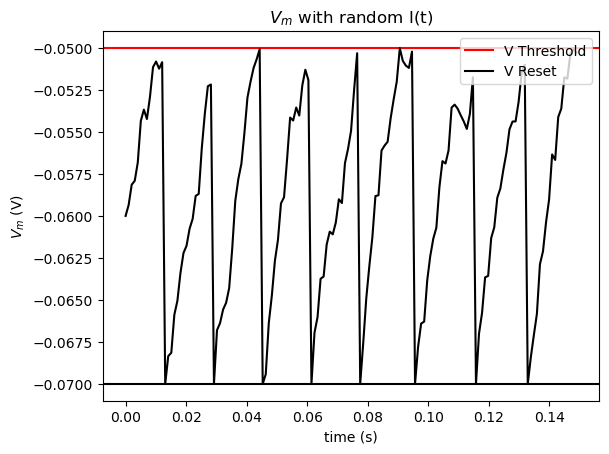

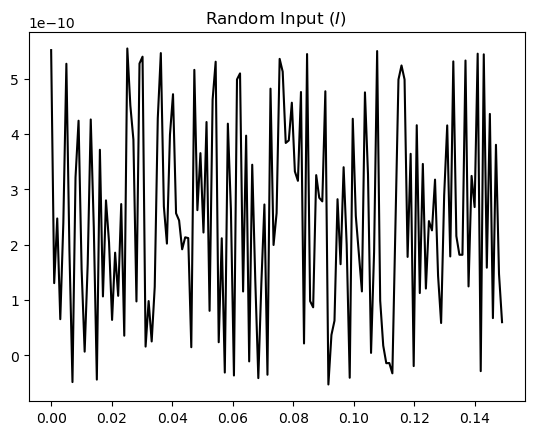

In [279]:


# Simulate current over time
input_current = GenerateInputCurrent()



# Loop for step_end steps
for step in range(1, step_end):

    # Compute v as function of i
    v[step] = v[step - 1] + (dt / tau) * (el - v[step - 1] + r * input_current[step])

    if (v[step]> vth):
      v[step] = v_reset
      
  

  # Plot membrane potential

plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')


plt.axhline(y=vth, color ='r', label='V Threshold')
plt.axhline(y=v_reset, color='k', label="V Reset")
plt.legend(loc="upper right")
plt.plot(t_range, v, 'k')
plt.show()

plt.figure()
plt.title('Random Input $(I)$ ')
plt.plot(t_range, input_current,'k')





